## Iris Flower Classification Model

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score, f1_score

In [2]:
# import the necessary libraries
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## loading the dataset

In [3]:
# load the dataset
df=pd.read_csv("Iris.csv")

In [4]:
# check the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# drop the id column
df.drop(columns="Id", inplace=True)

In [7]:
# check data descriptive statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.duplicated ().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool>

## visualizing the data

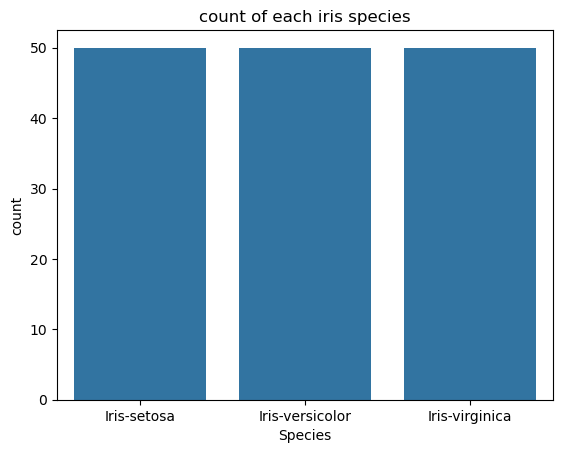

In [11]:
# visualize the count of each species
sns.countplot(x=df['Species'])
plt.title('count of each iris species')
plt.savefig("species count", dpi=300, bbox_inches="tight")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

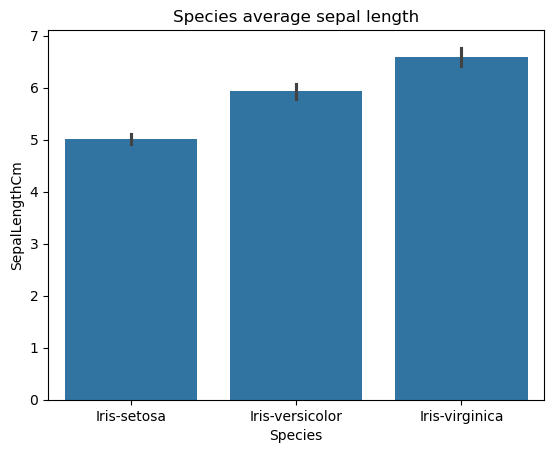

In [12]:
# check average sepal length across species
sns.barplot(data=df, x="Species", y="SepalLengthCm", estimator=np.mean)
plt.title("Species average sepal length")
plt.savefig("sepal length", dpi=300, bbox_inches="tight")
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\1893152772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Species", y="SepalWidthCm", palette="viridis", estimator=np.mean)


<function matplotlib.pyplot.show(close=None, block=None)>

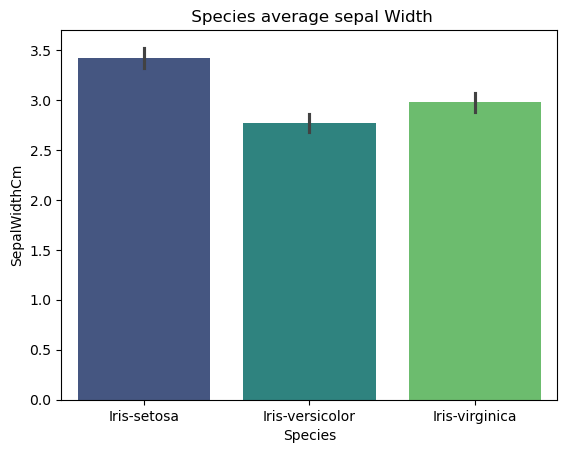

In [13]:
# check average sepal width across species
sns.barplot(data=df, x="Species", y="SepalWidthCm", palette="viridis", estimator=np.mean)
plt.title(" Species average sepal Width")
plt.savefig("sepal Width", dpi=300, bbox_inches="tight")
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\1416909430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Species", y="PetalLengthCm", palette="magma", estimator=np.mean)


<function matplotlib.pyplot.show(close=None, block=None)>

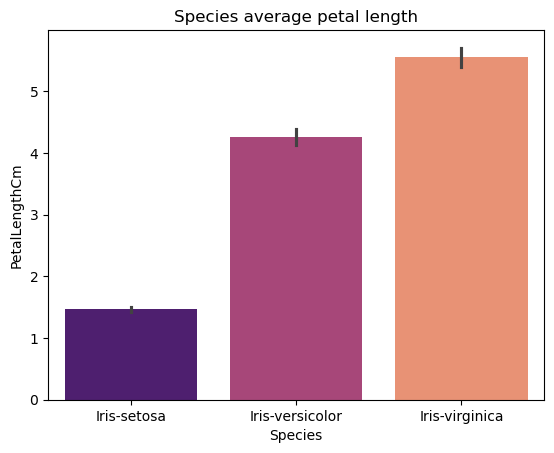

In [14]:
# check average petal length across species
sns.barplot(data=df, x="Species", y="PetalLengthCm", palette="magma", estimator=np.mean)
plt.title("Species average petal length")
plt.savefig("petal length", dpi=300, bbox_inches="tight")
plt.show

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\263813432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Species", y="PetalWidthCm", palette="coolwarm", estimator=np.mean)


<function matplotlib.pyplot.show(close=None, block=None)>

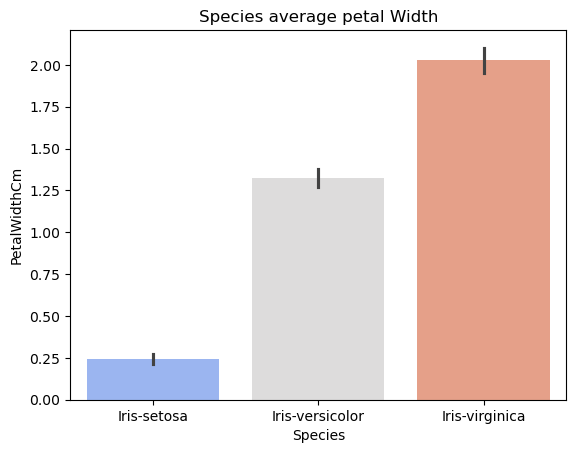

In [15]:
# check average average petal Width across species
sns.barplot(data=df, x="Species", y="PetalWidthCm", palette="coolwarm", estimator=np.mean)
plt.title("Species average petal Width")
plt.savefig("petal Width", dpi=300, bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

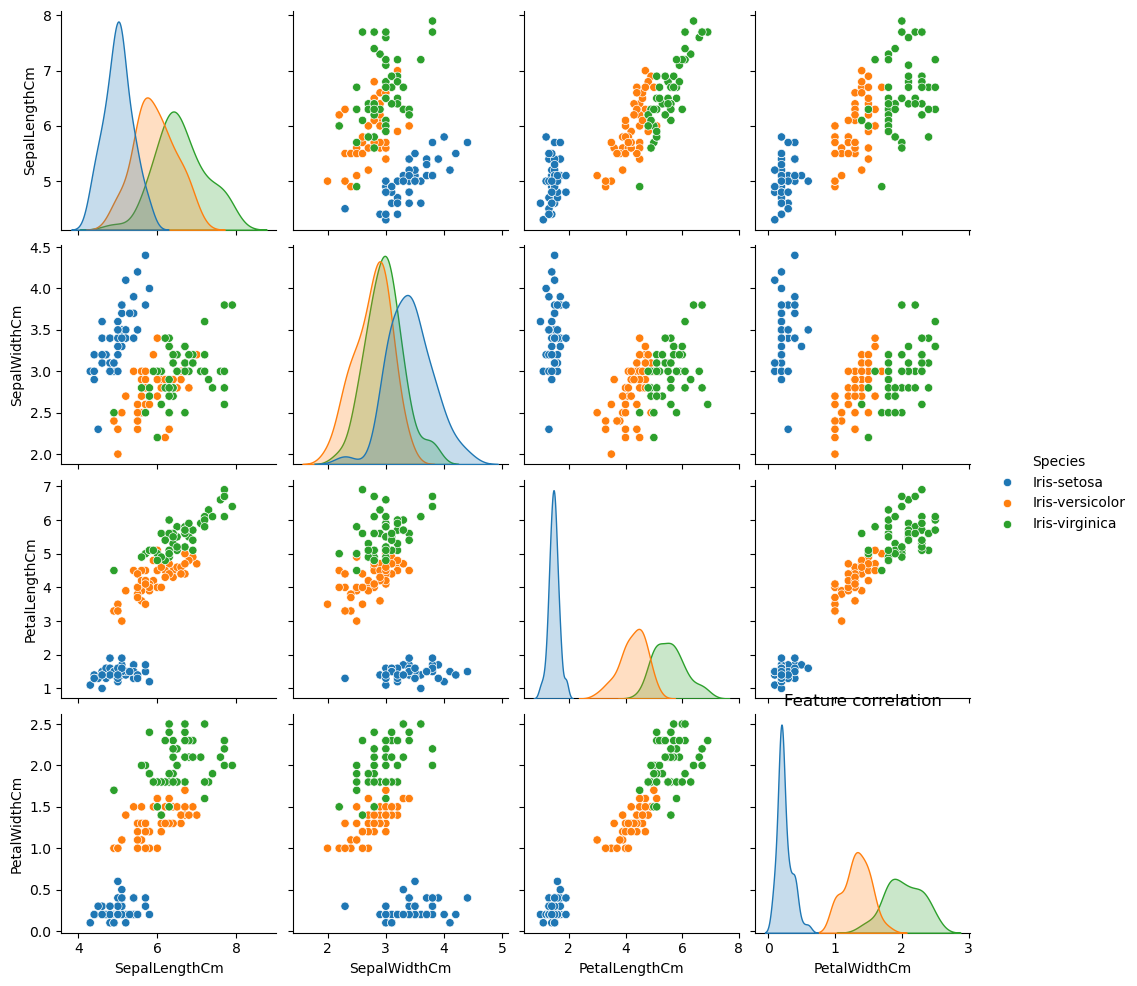

In [16]:
# check for relationship between features using a pairplot
sns.pairplot(df, hue='Species')
plt.title("Feature correlation")
plt.savefig("pairplot", dpi=300, bbox_inches="tight")
plt.show

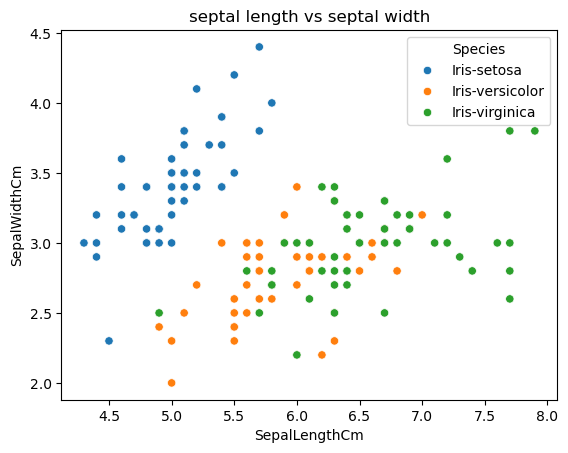

In [17]:
# relationship between septal length and septal width
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'], hue=df['Species'])
plt.title('septal length vs septal width')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\3043743954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species',y='PetalLengthCm',data=df, palette="magma")


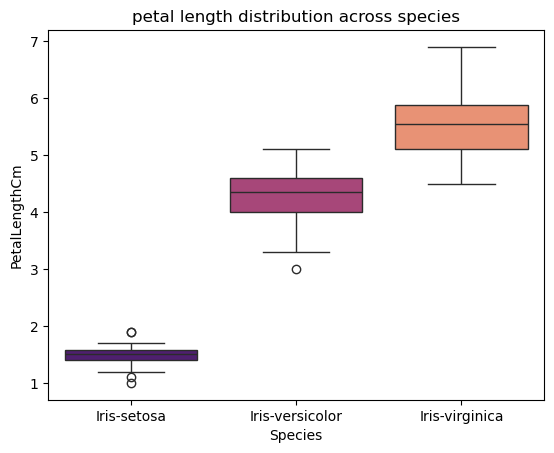

In [18]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df, palette="magma")
plt.title('petal length distribution across species')
plt.show()

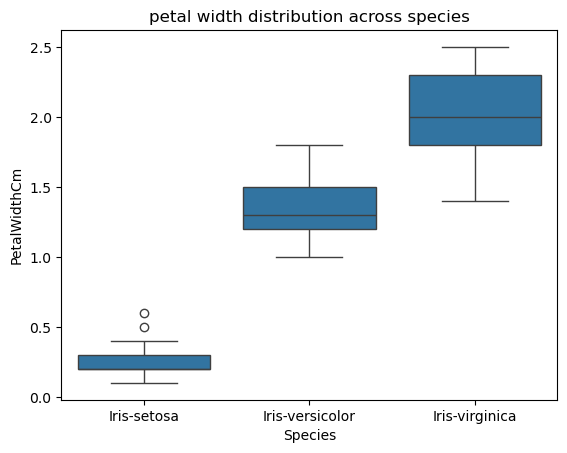

In [19]:
# box plot of petal width across species
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.title('petal width distribution across species')
plt.show()

In [20]:
# covert categorical data to numerical data for encoding
encoder= LabelEncoder()
df["Species"]=encoder.fit_transform(df["Species"])

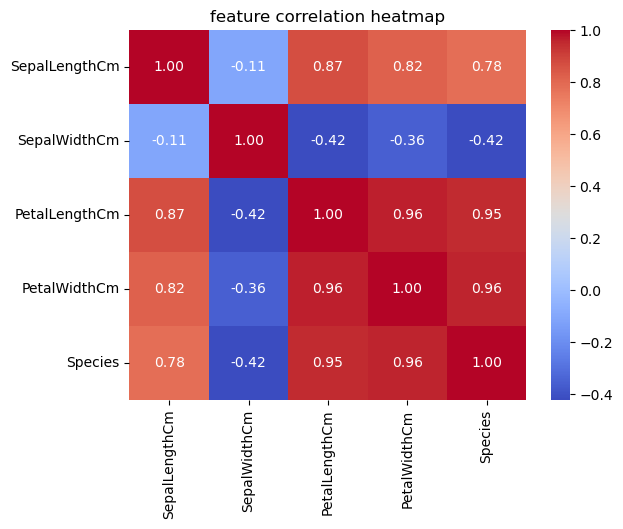

In [21]:
# check feature correlation
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("feature correlation heatmap")
plt.savefig("heatmap", dpi=300, bbox_inches="tight")
plt.show()

## splitting the dataset

#### defining target and feature variables

In [22]:
# split the dataset into feature and target
X=df.drop(columns=['Species'])
Y=df['Species']

#### training the dataset

In [23]:
# train the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [24]:
print('training set sizes:', X_train.shape)
print('training set sizes:',X_test.shape)

training set sizes: (120, 4)
training set sizes: (30, 4)


### training the model

In [25]:
rf_model= RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf_model.fit(X_train,Y_train)
dt_model= DecisionTreeClassifier(max_depth=3,random_state=42)
dt_model.fit(X_train,Y_train)
lr_model= LogisticRegression(max_iter=2000)
lr_model.fit(X_train,Y_train)


LogisticRegression(max_iter=2000)

### Model Evaluation

In [26]:
rf_pred= rf_model.predict(X_test)
dt_pred=dt_model.predict(X_test)
lr_pred=lr_model.predict(X_test)

In [27]:
# random forest model evaluation
rf_Accuracy= accuracy_score(Y_test, rf_pred)
rf_precision= precision_score(Y_test, rf_pred, average="macro")
rf_recall= recall_score(Y_test, rf_pred, average="macro")
rf_f1Score= f1_score(Y_test, rf_pred, average="macro")

print(f"rf_Model Accuracy:{rf_Accuracy:2f}")
print(f"rf_model precision:{rf_precision:2f}")
print(f"rf_model recall:{rf_recall:2f}")
print(f"rf_model f1 score:{rf_f1Score:2f}")

rf_Model Accuracy:1.000000
rf_model precision:1.000000
rf_model recall:1.000000
rf_model f1 score:1.000000


In [28]:
# evaluating decision tree model
dt_Accuracy= accuracy_score(Y_test, dt_pred)
dt_precision= precision_score(Y_test, dt_pred, average="macro")
dt_recall= recall_score(Y_test, dt_pred, average="macro")
dt_f1Score= f1_score(Y_test, dt_pred, average="macro")

print(f"dt_Model Accuracy:{dt_Accuracy:2f}")
print(f"dt_model precision:{dt_precision:2f}")
print(f"dt_model recall:{dt_recall:2f}")
print(f"dt_model f1 score:{dt_f1Score:2f}")

dt_Model Accuracy:1.000000
dt_model precision:1.000000
dt_model recall:1.000000
dt_model f1 score:1.000000


In [29]:
#  evaluate the logistic regression model
lr_Accuracy= accuracy_score(Y_test, lr_pred)
lr_precision= precision_score(Y_test, lr_pred, average="macro")
lr_recall= recall_score(Y_test, lr_pred, average="macro")
lr_f1Score= f1_score(Y_test, lr_pred, average="macro")

print(f"lr_Model Accuracy:{lr_Accuracy:2f}")
print(f"lr_model precision:{lr_precision:2f}")
print(f"lr_model recall:{lr_recall:2f}")
print(f"lr_model f1 score:{lr_f1Score:2f}")

lr_Model Accuracy:1.000000
lr_model precision:1.000000
lr_model recall:1.000000
lr_model f1 score:1.000000


In [30]:
# confusion matrix of the models
rf_cm = confusion_matrix(Y_test, rf_pred)
dt_cm= confusion_matrix(Y_test,dt_pred)
lr_cm=confusion_matrix(Y_test,lr_pred)

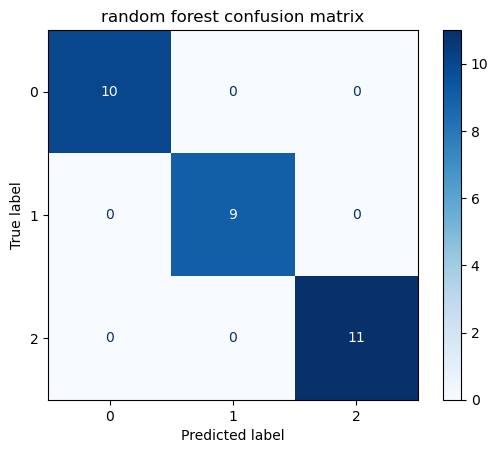

In [31]:
# onfusion matrix of random forest
disp= ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("random forest confusion matrix")
plt.savefig("rf confusion matrix", dpi=300, bbox_inches="tight")
plt.show()

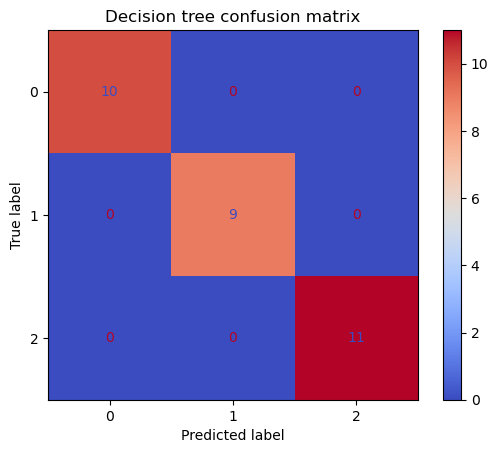

In [32]:
# confusion matrix of decision tree
disp= ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt_model.classes_)
disp.plot(cmap="coolwarm")
plt.title("Decision tree confusion matrix")
plt.savefig("Dt confusion matrix", dpi=300, bbox_inches="tight")
plt.show()


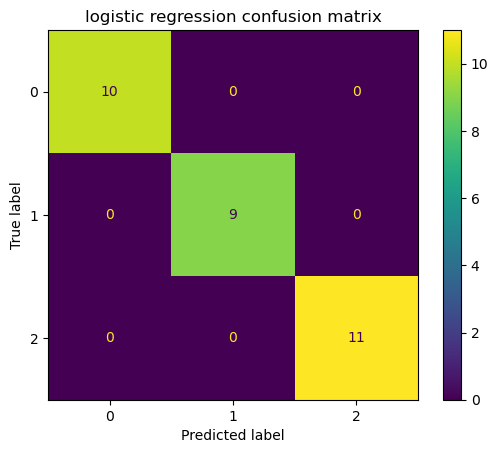

In [33]:
disp= ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr_model.classes_)
disp.plot(cmap="viridis")
plt.title("logistic regression confusion matrix")
plt.savefig("LR confusion matrix", dpi=300, bbox_inches="tight")
plt.show()


### Feature Importance In Random Forest

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\2553529936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importances, y=features, palette="viridis")


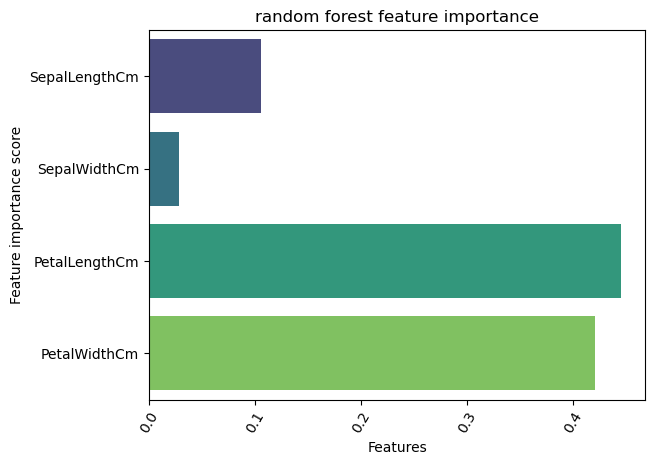

In [34]:
# random forest feature importance
rf_feature_importances= rf_model.feature_importances_
features= X.columns
sns.barplot(x=rf_feature_importances, y=features, palette="viridis")
plt.xticks(rotation=60)
plt.xlabel("Features")
plt.ylabel("Feature importance score")
plt.title("random forest feature importance")
plt.savefig("RF feature importance", dpi=300, bbox_inches="tight")

C:\Users\USER\AppData\Local\Temp\ipykernel_15952\2095391803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt_feature_importances, y=features, palette="magma")


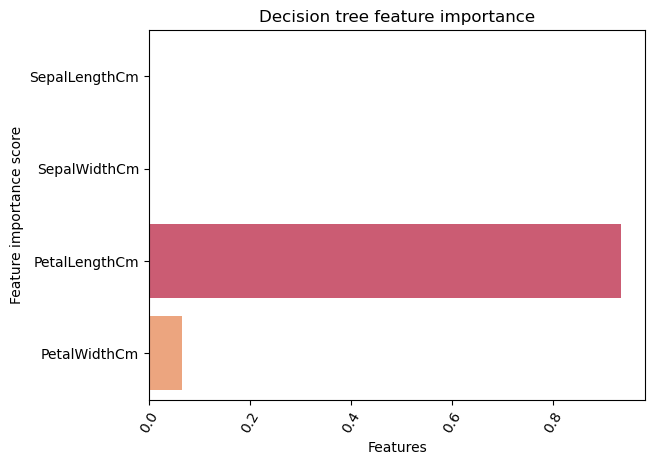

In [35]:
# decision tree feature importance
dt_feature_importances= dt_model.feature_importances_
features= X.columns
sns.barplot(x=dt_feature_importances, y=features, palette="magma")
plt.xticks(rotation=60)
plt.xlabel("Features")
plt.ylabel("Feature importance score")
plt.title("Decision tree feature importance")
plt.savefig("DT feature importance", dpi=300, bbox_inches="tight")

### Evaluating the logistic regression model

In [36]:
# evaluate the logistic model
mae= mean_absolute_error(Y_test, lr_pred)
mse=mean_squared_error(Y_test, lr_pred)
print("mean absolute error", mae)
print("mean squared error",mse)

mean absolute error 0.0
mean squared error 0.0
